## This is done using a new deep learning library called deep_autoviml
https://github.com/AutoViML/deep_autoviml

# Build keras pipelines and models in a single line of code! You can use this library for structured data, text, NLP, image whatever you want and combine deep and wide models etc. The amount of functionality in this single library is too numerous to list. Check it out yourself.

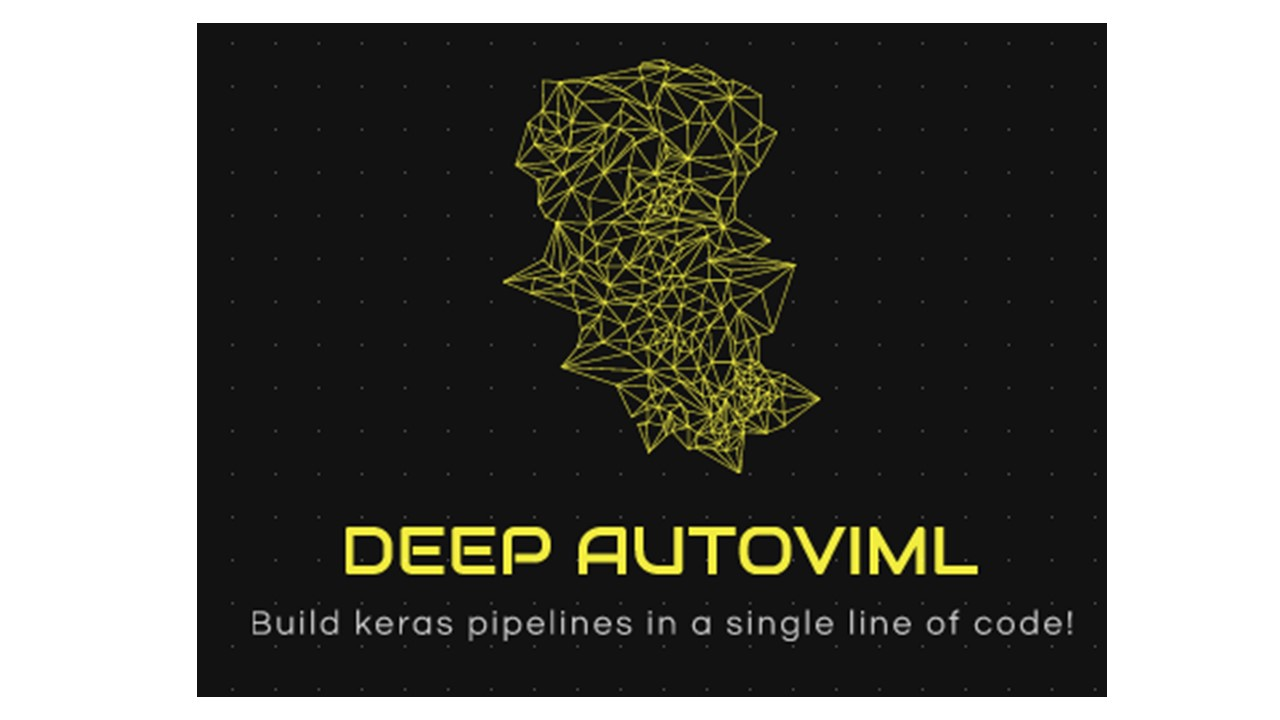

You must add the "load_kaggle" Utility Script from File Menu in Kaggle above. Don't forget!


In [ ]:
from load_kaggle import load_kaggle
subm,train, test = load_kaggle()

In [ ]:
train.head()

In [ ]:
### we will drop the standard error column since it is not there in test ##
train.drop('standard_error', axis=1,inplace=True)
print(train.shape)
train.head()

In [ ]:
test.head(2)

In [ ]:
#!pip install git+https://github.com/AutoViML/deep_autoviml.git
#!pip install deep_autoviml

In [ ]:
from deep_autoviml import deep_autoviml as deepauto

In [ ]:
nlp_column = 'excerpt'
target = 'target'

In [ ]:
project_name = "commonlit"
keras_model_type = 'auto'
model_options = {'nlp_char_limit':10, 'cat_feat_cross_flag':False,
                 'max_trials': 10, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': 'onecycle2', "optimizer": 'RMS'}

In [ ]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

In [ ]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

In [ ]:
predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)

In [ ]:
y_probas = predictions[0]
y_probas[:,:4]

for inum, each_t in enumerate(target):
    labels = np.unique(y_test[:,inum]) ### sometimes there is less classes
    plot_classification_results(y_test[:,inum], y_preds[:,inum], labels, labels, each_t) 

In [ ]:
subm[target] = y_probas.ravel()
subm.head()

In [ ]:
subm.to_csv('submission.csv', index=False)